In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
df['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [ ]:
df['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [ ]:
df.shape

(53940, 10)

In [ ]:
X=df.drop(columns=['cut'])
y=df['cut']

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

X_numerical = X.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Scaled numerical shape:", X_scaled.shape)
print("PCA transformed shape:", X_pca.shape)

Original shape: (53940, 9)
Scaled numerical shape: (53940, 7)
PCA transformed shape: (53940, 7)


In [ ]:
X=pd.get_dummies(X)

In [ ]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)
y_categorical=to_categorical(y_encoded)

In [ ]:
y_categorical

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score,classification_report
from keras.callbacks import EarlyStopping,ModelCheckpoint


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_categorical,test_size=0.2,random_state=42)

In [ ]:
y_categorical.shape

(53940, 5)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
y_categorical[0]

array([0., 0., 1., 0., 0.])

In [ ]:
y[0]

'Ideal'

In [ ]:
y_categorical[1]

array([0., 0., 0., 1., 0.])

In [ ]:
y[1]

'Premium'

In [ ]:
y_categorical[2]

array([0., 1., 0., 0., 0.])

In [ ]:
y[2]

'Good'

In [ ]:
y_categorical[3]

array([0., 0., 0., 1., 0.])

In [ ]:
y[3]

'Premium'

In [ ]:
model = Sequential([
    Dense(52,activation='relu',kernel_initializer='random_uniform'),
    Dense(66,activation='relu',kernel_initializer='he_uniform'),
    Dense(94, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(80, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(64,activation='relu',kernel_initializer='he_uniform'),
    Dropout(0.1),
    Dense(40,activation='relu',kernel_initializer='he_uniform'),
    Dense(24,activation='relu',kernel_initializer='he_uniform'),
    Dense(5, activation='softmax')
])


In [ ]:
from keras.optimizers.schedules import ExponentialDecay
lr_schedule=ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.4,
)

In [ ]:
from keras.optimizers import Adam
adam_ls=Adam(learning_rate=lr_schedule)

In [ ]:
#Callbacks
early_stop=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [ ]:

checkpoint=ModelCheckpoint(
    'diamonds_model1.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True
)

In [ ]:
#Compile model
model.compile(loss='categorical_crossentropy',optimizer=adam_ls,metrics=['accuracy'])

In [ ]:
#model.summary()

In [ ]:
#Fit  model
history=model.fit(
    X_train,y_train,
    epochs=100,#Let it train for longer and early stopping will halt early
    batch_size=40,
    verbose=1,
    validation_split=0.2, #Needed for val_loss monitoring
    callbacks=[early_stop,checkpoint])

Epoch 1/100
851/864 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5886 - loss: 1.0317
Epoch 1: val_accuracy improved from -inf to 0.70258, saving model to diamonds_model1.keras
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5895 - loss: 1.0298 - val_accuracy: 0.7026 - val_loss: 0.7963
Epoch 2/100
864/864 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6967 - loss: 0.7834
Epoch 2: val_accuracy improved from 0.70258 to 0.70896, saving model to diamonds_model1.keras
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6967 - loss: 0.7834 - val_accuracy: 0.7090 - val_loss: 0.7606
Epoch 3/100
851/864 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.7493
Epoch 3: val_accuracy improved from 0.70896 to 0.71382, saving model to diamonds_model1.keras
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7117 - loss: 0.7493 - val_accuracy: 0.7138 - val_loss: 0.7456
Epoch 4/100
857/864 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 0.7346
Epoch 4: val_accuracy

In [ ]:
history.history['accuracy']

[0.6456938982009888,
 0.6998059153556824,
 0.7109295725822449,
 0.715969979763031,
 0.7193012833595276,
 0.7217345833778381,
 0.7213869690895081,
 0.7224008440971375,
 0.7234147191047668,
 0.7231250405311584,
 0.7211262583732605,
 0.7220532298088074]

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f'Loss:{loss},Accuracy:{accuracy}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7194 - loss: 0.7317
Loss:0.7277745008468628,Accuracy:0.7172784805297852


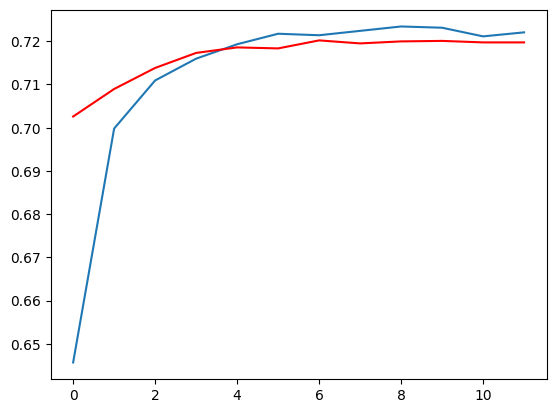

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='red')

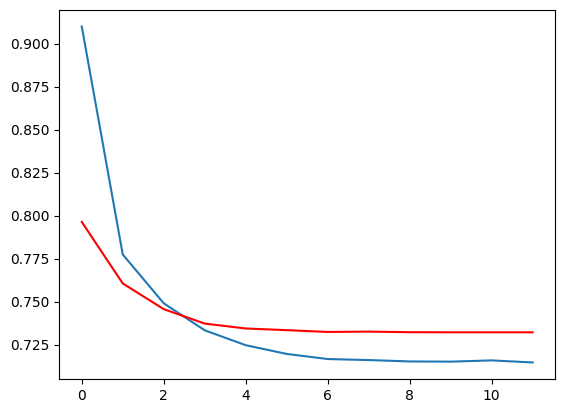

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')

In [ ]:
preds=model.predict(X_test[:10])
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


array([[1.2360452e-04, 8.5794367e-04, 8.6404908e-01, 3.5174936e-02,
        9.9794537e-02],
       [1.9686655e-03, 1.8061457e-02, 5.7275242e-01, 1.1756927e-01,
        2.8964826e-01],
       [4.6197751e-05, 3.5351372e-04, 8.9466709e-01, 2.4112154e-02,
        8.0821022e-02],
       [8.0357108e-04, 4.6306751e-03, 7.7156031e-01, 7.4452780e-02,
        1.4855270e-01],
       [1.2562157e-03, 5.3941105e-03, 7.3673576e-01, 1.0298691e-01,
        1.5362687e-01],
       [7.1692640e-01, 2.8059134e-01, 6.0172717e-04, 4.4369463e-07,
        1.8800729e-03],
       [2.7824601e-03, 2.2080077e-02, 5.9047091e-01, 1.0047846e-01,
        2.8418812e-01],
       [2.2075466e-05, 1.8079825e-04, 9.1287261e-01, 1.8485362e-02,
        6.8439238e-02],
       [9.2260743e-04, 1.1552618e-02, 4.3620709e-02, 6.9662464e-01,
        2.4727941e-01],
       [1.8755080e-03, 8.7269563e-03, 6.3985294e-01, 1.6998534e-01,
        1.7955916e-01]], dtype=float32)

In [ ]:
preds.max(axis=1)

array([0.8640491 , 0.5727524 , 0.8946671 , 0.7715603 , 0.73673576,
       0.7169264 , 0.5904709 , 0.9128726 , 0.69662464, 0.63985294],
      dtype=float32)

In [ ]:
pred_classes=np.argmax(preds,axis=1)
pred_classes

array([2, 2, 2, 2, 2, 0, 2, 2, 3, 2])

In [ ]:
y_test[:10]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
true_classes=np.argmax(y_test[:10],axis=1)
true_classes

array([2, 4, 2, 3, 2, 0, 2, 2, 3, 2])

In [ ]:
##Model2

In [ ]:
model2 = Sequential([
    Dense(30,activation='relu',kernel_initializer='random_uniform'),
    Dense(54,activation='relu',kernel_initializer='he_uniform'),
    Dense(80, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.3),
    Dense(126, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.4),
    Dense(92, activation='relu', kernel_initializer='he_uniform'),

    Dense(74,activation='relu',kernel_initializer='he_uniform'),
    Dropout(0.3),
    Dense(61,activation='relu',kernel_initializer='he_uniform'),
    Dropout(0.4),
    Dense(43,activation='relu',kernel_initializer='he_uniform'),
    Dense(27,activation='relu',kernel_initializer='he_uniform'),
    Dense(5, activation='softmax')
])

In [ ]:
from keras.optimizers.schedules import ExponentialDecay
lr_schedule=ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000, #no.of steps before applying decay
    decay_rate=0.4, #Multiply LR with this factor for every decay steps
    #staircase=True  #Set to true for discrete drops, false for smooth decay
)

In [ ]:
from keras.optimizers import Adam
adam_ls=Adam(learning_rate=lr_schedule)

In [ ]:
#Callbacks
early_stop2=EarlyStopping(
    monitor='val_accuracy',             #you can also use 'loss' if no validation data
    patience=5,                     #waits for 5 epochs after no improvement or no loss reduction is seen
    verbose=1,
    restore_best_weights=True
)

In [ ]:

checkpoint2=ModelCheckpoint(
    'diamonds_model1.keras',   #file to save best model
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True
)

In [ ]:
#Compile model
model2.compile(loss='categorical_crossentropy',optimizer=adam_ls,metrics=['accuracy'])

In [ ]:
#Fit  model
history=model2.fit(
    X_train,y_train,
    epochs=100,
    batch_size=40,
    verbose=1,
    validation_split=0.2, #Needed for val_loss monitoring
    callbacks=[early_stop2,checkpoint2])

Epoch 1/100
853/864 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5278 - loss: 1.1703
Epoch 1: val_accuracy improved from -inf to 0.67315, saving model to diamonds_model1.keras
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5288 - loss: 1.1684 - val_accuracy: 0.6732 - val_loss: 0.8535
Epoch 2/100
858/864 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6705 - loss: 0.8502
Epoch 2: val_accuracy improved from 0.67315 to 0.69471, saving model to diamonds_model1.keras
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6706 - loss: 0.8501 - val_accuracy: 0.6947 - val_loss: 0.7995
Epoch 3/100
854/864 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6974 - loss: 0.7937
Epoch 3: val_accuracy improved from 0.69471 to 0.69957, saving model to diamonds_model1.keras
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6974 - loss: 0.7936 - val_accuracy: 0.6996 - val_loss: 0.8056
Epoch 4/100
859/864 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7025 - loss: 0.7823
Epoch 4: val_accuracy 